Processed 35mm_#001.txt: wx = 3439.26, wy = 3062.9
Processed 35.5mm_#001.txt: wx = 3229.87, wy = 2897.91
Processed 36mm_#001.txt: wx = 3028.3, wy = 2726.22
Processed 36.5mm_#001.txt: wx = 2820.17, wy = 2548.99
Processed 37mm_#001.txt: wx = 2625.78, wy = 2373.64
Processed 37.5mm_#001.txt: wx = 2425.43, wy = 2222.26
Processed 38mm_#001.txt: wx = 2226.71, wy = 2040.59
Processed 38.5mm_#001.txt: wx = 2025.4, wy = 1862.54
Processed 39mm_#001.txt: wx = 1821.66, wy = 1688.72
Processed 39.5mm_#001.txt: wx = 1627.44, wy = 1510.75
Processed 40mm_#001.txt: wx = 1428.14, wy = 1341.02
Processed 40.5mm_#001.txt: wx = 1235.57, wy = 1166.36
Processed 41mm_#001.txt: wx = 1045.55, wy = 991.46
Processed 41.5mm_#001.txt: wx = 861.13, wy = 830.4
Processed 41.75mm_#001.txt: wx = 771.31, wy = 752.36
Processed 42mm_#001.txt: wx = 687.47, wy = 679.73
Processed 42.25mm_#001.txt: wx = 608.58, wy = 610.26
Processed 42.5mm_#001.txt: wx = 538.55, wy = 548.52
Processed 42.75mm_#001.txt: wx = 471.54, wy = 492.13
Proc

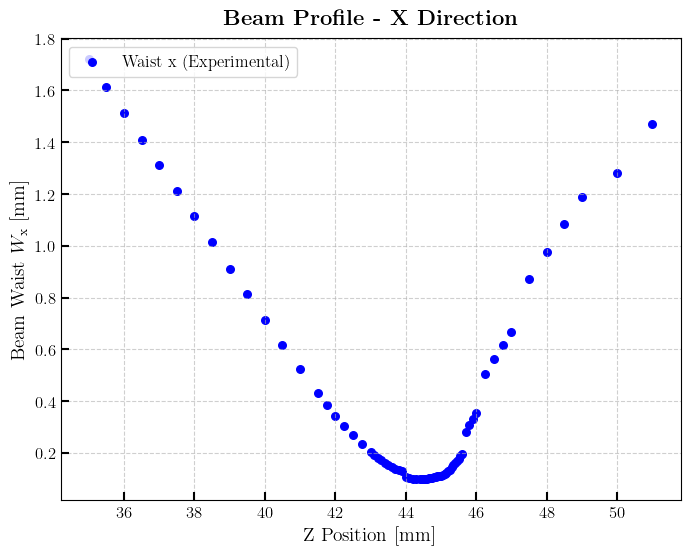

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251021_old_telescoping_LB1471-C/fig/beam_profile_y.png


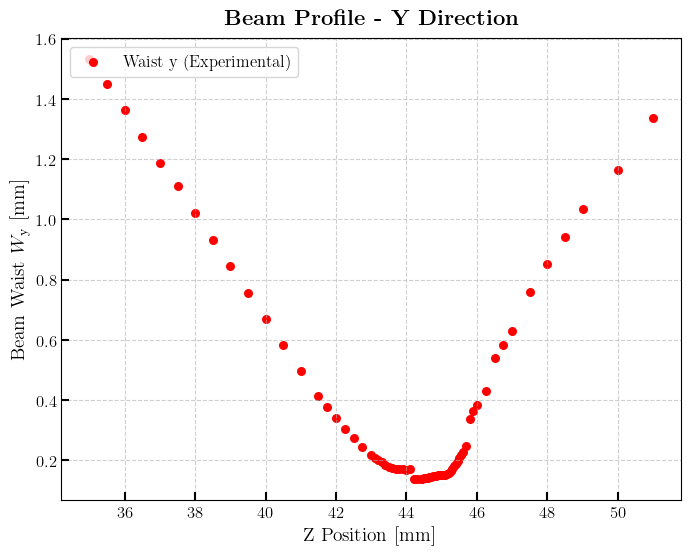

In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251021_old_telescoping_LB1471-C"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 70],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to µm) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Comparison

CMOS Data:
Processed 36 valid data points out of 36 files.
z = 27.5 mm, Width_x = 1.367 mm, Width_y = 1.218 mm
z = 28.5 mm, Width_x = 1.179 mm, Width_y = 1.048 mm
z = 29.5 mm, Width_x = 0.989 mm, Width_y = 0.877 mm
z = 30.0 mm, Width_x = 0.894 mm, Width_y = 0.795 mm
z = 30.5 mm, Width_x = 0.799 mm, Width_y = 0.709 mm
z = 31.0 mm, Width_x = 0.705 mm, Width_y = 0.628 mm
z = 31.5 mm, Width_x = 0.612 mm, Width_y = 0.549 mm
z = 32.0 mm, Width_x = 0.519 mm, Width_y = 0.469 mm
z = 32.5 mm, Width_x = 0.431 mm, Width_y = 0.393 mm
z = 33.0 mm, Width_x = 0.347 mm, Width_y = 0.322 mm
z = 33.5 mm, Width_x = 0.273 mm, Width_y = 0.260 mm
z = 34.0 mm, Width_x = 0.214 mm, Width_y = 0.211 mm
z = 34.1 mm, Width_x = 0.204 mm, Width_y = 0.203 mm
z = 34.2 mm, Width_x = 0.196 mm, Width_y = 0.196 mm
z = 34.3 mm, Width_x = 0.189 mm, Width_y = 0.191 mm
z = 34.4 mm, Width_x = 0.184 mm, Width_y = 0.187 mm
z = 34.5 mm, Width_x = 0.180 mm, Width_y = 0.183 mm
z = 34.6 mm, Width_x = 0.178 mm, Width_y = 0.183 mm
z = 3

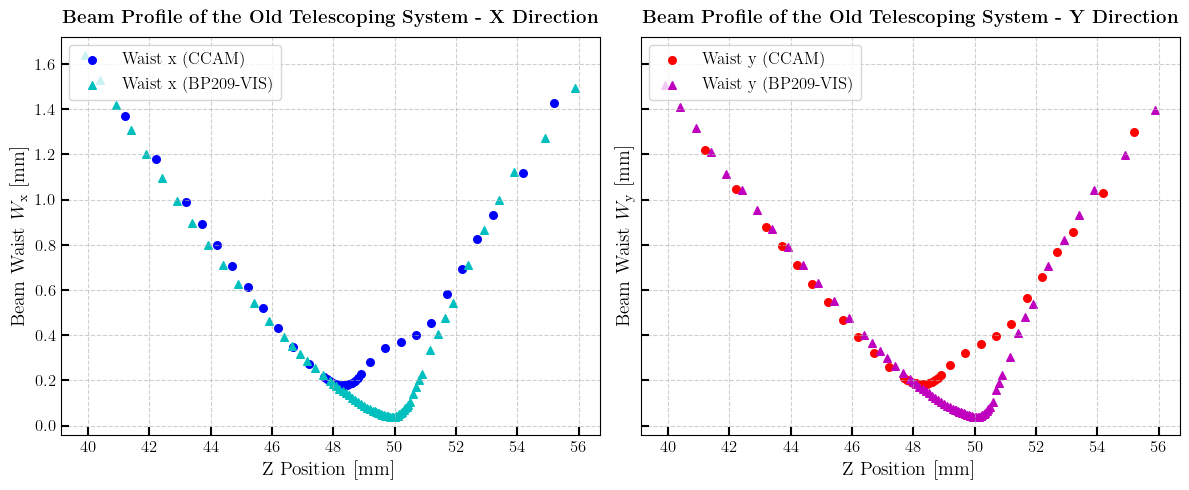

In [10]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251021_old_telescoping_LB1471-C_CMOS"
data_path_bp209 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251021_old_telescoping_LB1471-C"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

# Extract CMOS data
for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)

# Convert CMOS data to numpy arrays and sort
z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# BP209-VIS data
file_list_bp209 = sorted([f for f in glob.glob(os.path.join(data_path_bp209, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_bp209 = []
width_x_bp209 = []
width_y_bp209 = []

# Extract BP209-VIS data
for file in file_list_bp209:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x_bp209.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_bp209.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_bp209.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert BP209-VIS data to numpy arrays and sort
z_values_bp209 = np.array(z_values_bp209)
width_x_bp209 = np.array(width_x_bp209)
width_y_bp209 = np.array(width_y_bp209)
sorted_indices_bp209 = np.argsort(z_values_bp209)
z_values_bp209 = z_values_bp209[sorted_indices_bp209]
width_x_bp209 = width_x_bp209[sorted_indices_bp209]
width_y_bp209 = width_y_bp209[sorted_indices_bp209]

# Print data
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nBP209-VIS Data:")
print(f"Processed {len(z_values_bp209)} valid data points out of {len(file_list_bp209)} files.")
for z, wx, wy in zip(z_values_bp209, width_x_bp209, width_y_bp209):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Min waist values
min_waist_exp_x_cmos = min(width_x_cmos) * 1000
min_waist_exp_y_cmos = min(width_y_cmos) * 1000
min_waist_exp_x_bp209 = min(width_x_bp209) * 1000
min_waist_exp_y_bp209 = min(width_y_bp209) * 1000

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("BP209-VIS Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_bp209:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_bp209:.2f} μm")

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos+13.7, width_x_cmos, color='b', label='Waist x (CCAM)', marker='o', s=30)
ax1.scatter(z_values_bp209+4.9, width_x_bp209, color='c', label='Waist x (BP209-VIS)', marker='^', s=30)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile of the Old Telescoping System - X Direction}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos+13.7, width_y_cmos, color='r', label='Waist y (CCAM)', marker='o', s=30)
ax2.scatter(z_values_bp209+4.9, width_y_bp209, color='m', label='Waist y (BP209-VIS)', marker='^', s=30)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile of the Old Telescoping System - Y Direction}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

CMOS Data:
Processed 36 valid data points out of 36 files.
z = 27.5 mm, Width_x = 1.367 mm, Width_y = 1.218 mm
z = 28.5 mm, Width_x = 1.179 mm, Width_y = 1.048 mm
z = 29.5 mm, Width_x = 0.989 mm, Width_y = 0.877 mm
z = 30.0 mm, Width_x = 0.894 mm, Width_y = 0.795 mm
z = 30.5 mm, Width_x = 0.799 mm, Width_y = 0.709 mm
z = 31.0 mm, Width_x = 0.705 mm, Width_y = 0.628 mm
z = 31.5 mm, Width_x = 0.612 mm, Width_y = 0.549 mm
z = 32.0 mm, Width_x = 0.519 mm, Width_y = 0.469 mm
z = 32.5 mm, Width_x = 0.431 mm, Width_y = 0.393 mm
z = 33.0 mm, Width_x = 0.347 mm, Width_y = 0.322 mm
z = 33.5 mm, Width_x = 0.273 mm, Width_y = 0.260 mm
z = 34.0 mm, Width_x = 0.214 mm, Width_y = 0.211 mm
z = 34.1 mm, Width_x = 0.204 mm, Width_y = 0.203 mm
z = 34.2 mm, Width_x = 0.196 mm, Width_y = 0.196 mm
z = 34.3 mm, Width_x = 0.189 mm, Width_y = 0.191 mm
z = 34.4 mm, Width_x = 0.184 mm, Width_y = 0.187 mm
z = 34.5 mm, Width_x = 0.180 mm, Width_y = 0.183 mm
z = 34.6 mm, Width_x = 0.178 mm, Width_y = 0.183 mm
z = 3

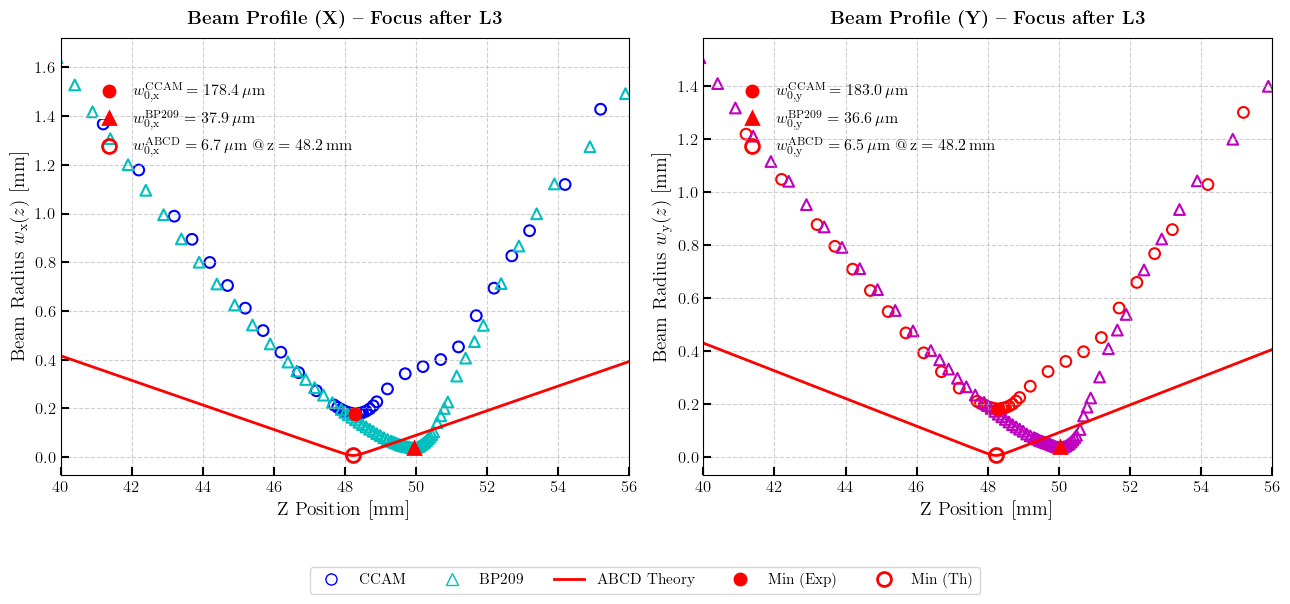

In [9]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/20251021_old_telescoping_LB1471-C_CMOS"
data_path_bp209 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251021_old_telescoping_LB1471-C"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)
# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv"))
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []
# Extract CMOS data
for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)
    with open(file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)
# Convert CMOS757 data to numpy arrays and sort
z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]
# BP209-VIS data
file_list_bp209 = sorted([f for f in glob.glob(os.path.join(data_path_bp209, "*mm_#001.txt"))
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_bp209 = []
width_x_bp209 = []
width_y_bp209 = []
# Extract BP209-VIS data
for file in file_list_bp209:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue
    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break
    if clip_width_x is not None and clip_width_y is not None:
        width_x_bp209.append(clip_width_x / 2 / 1000) # Convert µm to mm, diameter to radius
        width_y_bp209.append(clip_width_y / 2 / 1000) # Convert µm to mm, diameter to radius
        z_values_bp209.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")
# Convert BP209-VIS data to numpy arrays and sort
z_values_bp209 = np.array(z_values_bp209)
width_x_bp209 = np.array(width_x_bp209)
width_y_bp209 = np.array(width_y_bp209)
sorted_indices_bp209 = np.argsort(z_values_bp209)
z_values_bp209 = z_values_bp209[sorted_indices_bp209]
width_x_bp209 = width_x_bp209[sorted_indices_bp209]
width_y_bp209 = width_y_bp209[sorted_indices_bp209]
# Print data
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")
print("\nBP209-VIS Data:")
print(f"Processed {len(z_values_bp209)} valid data points out of {len(file_list_bp209)} files.")
for z, wx, wy in zip(z_values_bp209, width_x_bp209, width_y_bp209):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")
# Min waist values
min_waist_exp_x_cmos = min(width_x_cmos) * 1000
min_waist_exp_y_cmos = min(width_y_cmos) * 1000
min_waist_exp_x_bp209 = min(width_x_bp209) * 1000
min_waist_exp_y_bp209 = min(width_y_bp209) * 1000
print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f" Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f" Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("BP209-VIS Experimental:")
print(f" Min Waist X (Clip): {min_waist_exp_x_bp209:.2f} μm")
print(f" Min Waist Y (Clip): {min_waist_exp_y_bp209:.2f} μm")
# ----------------------------------------------------------------------
# 1. SHIFT EXPERIMENTAL DATA SO THAT LENS L3 IS AT z = 0
# ----------------------------------------------------------------------
z_cmos_shifted = z_values_cmos + 13.7 # your original offset
z_bp209_shifted = z_values_bp209 + 4.9 # your original offset
# ----------------------------------------------------------------------
# 2. THEORETICAL PROPAGATION AFTER L3 USING FULL ABCD MODEL (L3 @ z = 441 → shift to z = 0)
# ----------------------------------------------------------------------
λ = 1.064e-3 # wavelength in mm
f_L3 = 50.0 # focal length of L3 in mm
z_lens3 = 441.0  # L3 position in original coordinate

# === FULL ABCD MODEL UP TO L3 (from your second script) ===
focal_length1 = 50.0
focal_length2 = 250.0
focal_length3 = 50.0
z_lens2 = 300.0

# Initial beam: use average of min measured waist before L3 as w0_guess
w0_before_x = min(width_x_cmos.min(), width_x_bp209.min())
w0_before_y = min(width_y_cmos.min(), width_y_bp209.min())
z_R_initial_x = np.pi * w0_before_x**2 / λ
z_R_initial_y = np.pi * w0_before_y**2 / λ
q0_x = 0 + 1j * z_R_initial_x
q0_y = 0 + 1j * z_R_initial_y

# Lens 1 @ z=0
q1_x = q0_x / (1 - q0_x / focal_length1)
q1_y = q0_y / (1 - q0_y / focal_length1)

# Free space to Lens 2 @ 300 mm
q2_x = q1_x + z_lens2
q2_y = q1_y + z_lens2

# Lens 2
q3_x = q2_x / (1 - q2_x / focal_length2)
q3_y = q2_y / (1 - q2_y / focal_length2)

# Free space to Lens 3 @ 441 mm
q4_x = q3_x + (z_lens3 - z_lens2)
q4_y = q3_y + (z_lens3 - z_lens2)

# Lens 3
q5_x = q4_x / (1 - q4_x / focal_length3)
q5_y = q4_y / (1 - q4_y / focal_length3)

# === PROPAGATE AFTER L3 (z_rel from 40 to 56 mm, L3 @ z_rel = 0) ===
z_rel = np.linspace(40, 56, 1200)
w_th_x = np.empty_like(z_rel)
w_th_y = np.empty_like(z_rel)

for i, dz in enumerate(z_rel):
    # Propagate q after L3
    q_x = q5_x + dz
    q_y = q5_y + dz
    inv_q_x = 1.0 / q_x
    inv_q_y = 1.0 / q_y
    if inv_q_x.imag < -1e-12:
        w_th_x[i] = np.sqrt(-λ / (np.pi * inv_q_x.imag))
    else:
        w_th_x[i] = np.nan
    if inv_q_y.imag < -1e-12:
        w_th_y[i] = np.sqrt(-λ / (np.pi * inv_q_y.imag))
    else:
        w_th_y[i] = np.nan

# Theoretical focus and waist
valid_x = ~np.isnan(w_th_x)
valid_y = ~np.isnan(w_th_y)
i_focus_x = np.argmin(w_th_x[valid_x]) if np.any(valid_x) else None
i_focus_y = np.argmin(w_th_y[valid_y]) if np.any(valid_y) else None
z_focus_x = z_rel[valid_x][i_focus_x] if i_focus_x is not None else np.nan
z_focus_y = z_rel[valid_y][i_focus_y] if i_focus_y is not None else np.nan
w0_th_x = w_th_x[valid_x][i_focus_x] * 1000 if i_focus_x is not None else np.nan
w0_th_y = w_th_y[valid_y][i_focus_y] * 1000 if i_focus_y is not None else np.nan

# ----------------------------------------------------------------------
# 3. PLOTTING (X & Y side-by-side, zoom 40–56 mm)
# ----------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), sharey=False)
# ---------- X DIRECTION ----------
# hollow points
i_min_cx = np.argmin(width_x_cmos)
mask_cx = np.arange(len(width_x_cmos)) != i_min_cx
ax1.scatter(z_cmos_shifted[mask_cx], width_x_cmos[mask_cx],
            facecolors='none', edgecolors='b', marker='o', s=60, linewidths=1.5,
            label=r'CCAM ($w_x$)')
i_min_bx = np.argmin(width_x_bp209)
mask_bx = np.arange(len(width_x_bp209)) != i_min_bx
ax1.scatter(z_bp209_shifted[mask_bx], width_x_bp209[mask_bx],
            facecolors='none', edgecolors='c', marker='^', s=60, linewidths=1.5,
            label=r'BP209 ($w_x$)')
# red filled minima
ax1.plot(z_cmos_shifted[i_min_cx], width_x_cmos[i_min_cx],
         'o', mec='red', mfc='red', mew=2, ms=8)
ax1.plot(z_bp209_shifted[i_min_bx], width_x_bp209[i_min_bx],
         '^', mec='red', mfc='red', mew=2, ms=8)
# theory
line_th_x = ax1.plot(z_rel, w_th_x, 'red', lw=2, label=r'ABCD Theory ($w_x$)')[0]
if not np.isnan(z_focus_x):
    ax1.plot(z_focus_x, w_th_x[valid_x][i_focus_x], 'o', mec='red', mfc='none', mew=2, ms=10)

ax1.set_xlim(40, 56)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Radius $w_{\rm{x}}(z)$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile (X) – Focus after L3}', fontsize=13.5,
              fontweight='bold', pad=10)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6,
                width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# ---------- Y DIRECTION ----------
i_min_cy = np.argmin(width_y_cmos)
mask_cy = np.arange(len(width_y_cmos)) != i_min_cy
ax2.scatter(z_cmos_shifted[mask_cy], width_y_cmos[mask_cy],
            facecolors='none', edgecolors='r', marker='o', s=60, linewidths=1.5,
            label=r'CCAM ($w_y$)')
i_min_by = np.argmin(width_y_bp209)
mask_by = np.arange(len(width_y_bp209)) != i_min_by
ax2.scatter(z_bp209_shifted[mask_by], width_y_bp209[mask_by],
            facecolors='none', edgecolors='m', marker='^', s=60, linewidths=1.5,
            label=r'BP209 ($w_y$)')
ax2.plot(z_cmos_shifted[i_min_cy], width_y_cmos[i_min_cy],
         'o', mec='red', mfc='red', mew=2, ms=8)
ax2.plot(z_bp209_shifted[i_min_by], width_y_bp209[i_min_by],
         '^', mec='red', mfc='red', mew=2, ms=8)
ax2.plot(z_rel, w_th_y, 'red', lw=2, label=r'ABCD Theory ($w_y$)')
if not np.isnan(z_focus_y):
    ax2.plot(z_focus_y, w_th_y[valid_y][i_focus_y], 'o', mec='red', mfc='none', mew=2, ms=10)

ax2.set_xlim(40, 56)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_ylabel(r'Beam Radius $w_{\rm{y}}(z)$ [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile (Y) – Focus after L3}', fontsize=13.5,
              fontweight='bold', pad=10)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6,
                width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

# Unified legend (outside plot)
handles = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor='b', markerfacecolor='none', markersize=8, lw=1.5, label=r'CCAM'),
    Line2D([0], [0], marker='^', color='w', markeredgecolor='c', markerfacecolor='none', markersize=8, lw=1.5, label=r'BP209'),
    Line2D([0], [0], color='red', lw=2, label=r'ABCD Theory'),
    Line2D([0], [0], marker='o', color='w', markeredgecolor='red', markerfacecolor='red', markersize=8, mew=2, label=r'Min (Exp)'),
    Line2D([0], [0], marker='o', color='w', markeredgecolor='red', markerfacecolor='none', markersize=10, mew=2, label=r'Min (Th)')
]
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=5, fontsize=11, frameon=True)

# ----------------------------------------------------------------------
# 4. INSET RESULT BOX (frameon=False) – now works with usetex
# ----------------------------------------------------------------------
inset_x = ax1.inset_axes([0.04, 0.55, 0.38, 0.38])
inset_x.axis('off')
handles_x = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor='red',
           markerfacecolor='red', markersize=8, markeredgewidth=2,
           label=rf'$w_{{0,\rm{{x}}}}^{{\rm{{CCAM}}}} = {min_waist_exp_x_cmos:.1f}\,\mu\rm{{m}}$'),
    Line2D([0], [0], marker='^', color='w', markeredgecolor='red',
           markerfacecolor='red', markersize=8, markeredgewidth=2,
           label=rf'$w_{{0,\rm{{x}}}}^{{\rm{{BP209}}}} = {min_waist_exp_x_bp209:.1f}\,\mu\rm{{m}}$'),
]
if not np.isnan(w0_th_x):
    handles_x.append(
        Line2D([0], [0], marker='o', color='w', markeredgecolor='red',
               markerfacecolor='none', markersize=10, markeredgewidth=2,
               label=rf'$w_{{0,\rm{{x}}}}^{{\rm{{ABCD}}}} = {w0_th_x:.1f}\,\mu\rm{{m}}\;@\,z={z_focus_x:.1f}\,\rm{{mm}}$')
    )
inset_x.legend(handles=handles_x, loc='upper left', fontsize=11.5,
               frameon=False, handlelength=1.4)

inset_y = ax2.inset_axes([0.04, 0.55, 0.38, 0.38])
inset_y.axis('off')
handles_y = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor='red',
           markerfacecolor='red', markersize=8, markeredgewidth=2,
           label=rf'$w_{{0,\rm{{y}}}}^{{\rm{{CCAM}}}} = {min_waist_exp_y_cmos:.1f}\,\mu\rm{{m}}$'),
    Line2D([0], [0], marker='^', color='w', markeredgecolor='red',
           markerfacecolor='red', markersize=8, markeredgewidth=2,
           label=rf'$w_{{0,\rm{{y}}}}^{{\rm{{BP209}}}} = {min_waist_exp_y_bp209:.1f}\,\mu\rm{{m}}$'),
]
if not np.isnan(w0_th_y):
    handles_y.append(
        Line2D([0], [0], marker='o', color='w', markeredgecolor='red',
               markerfacecolor='none', markersize=10, markeredgewidth=2,
               label=rf'$w_{{0,\rm{{y}}}}^{{\rm{{ABCD}}}} = {w0_th_y:.1f}\,\mu\rm{{m}}\;@\,z={z_focus_y:.1f}\,\rm{{mm}}$')
    )
inset_y.legend(handles=handles_y, loc='upper left', fontsize=11.5,
               frameon=False, handlelength=1.4)

# ----------------------------------------------------------------------
# 5. SAVE & SHOW
# ----------------------------------------------------------------------
plt.tight_layout(rect=[0, 0.06, 1, 0.96])  # Make room for legend
save_comparison = os.path.join(fig_dir, "beam_profile_comparison_focus_zoom.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white',
            bbox_extra_artists=[inset_x, inset_y])
print(f"Saved: {save_comparison}")
plt.show()

### TOTAL FIT

Processed 35mm_#001.txt: wx = 3439.26, wy = 3062.9
Processed 35.5mm_#001.txt: wx = 3229.87, wy = 2897.91
Processed 36mm_#001.txt: wx = 3028.3, wy = 2726.22
Processed 36.5mm_#001.txt: wx = 2820.17, wy = 2548.99
Processed 37mm_#001.txt: wx = 2625.78, wy = 2373.64
Processed 37.5mm_#001.txt: wx = 2425.43, wy = 2222.26
Processed 38mm_#001.txt: wx = 2226.71, wy = 2040.59
Processed 38.5mm_#001.txt: wx = 2025.4, wy = 1862.54
Processed 39mm_#001.txt: wx = 1821.66, wy = 1688.72
Processed 39.5mm_#001.txt: wx = 1627.44, wy = 1510.75
Processed 40mm_#001.txt: wx = 1428.14, wy = 1341.02
Processed 40.5mm_#001.txt: wx = 1235.57, wy = 1166.36
Processed 41mm_#001.txt: wx = 1045.55, wy = 991.46
Processed 41.5mm_#001.txt: wx = 861.13, wy = 830.4
Processed 41.75mm_#001.txt: wx = 771.31, wy = 752.36
Processed 42mm_#001.txt: wx = 687.47, wy = 679.73
Processed 42.25mm_#001.txt: wx = 608.58, wy = 610.26
Processed 42.5mm_#001.txt: wx = 538.55, wy = 548.52
Processed 42.75mm_#001.txt: wx = 471.54, wy = 492.13
Proc

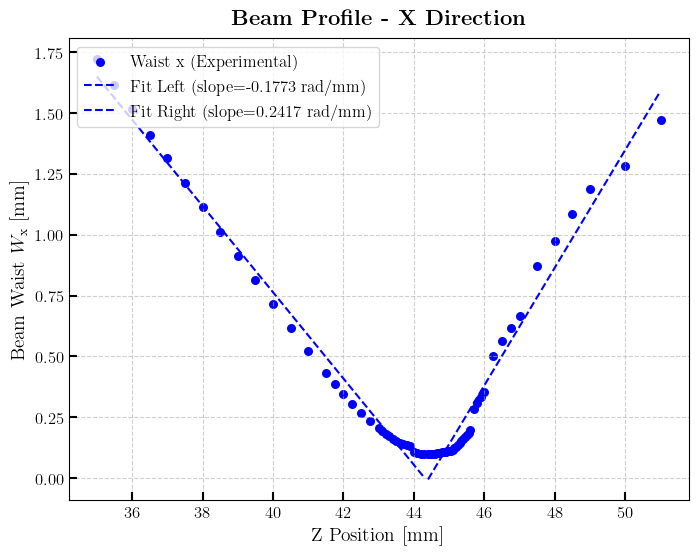

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251021_old_telescoping_LB1471-C/fig/beam_profile_y.png


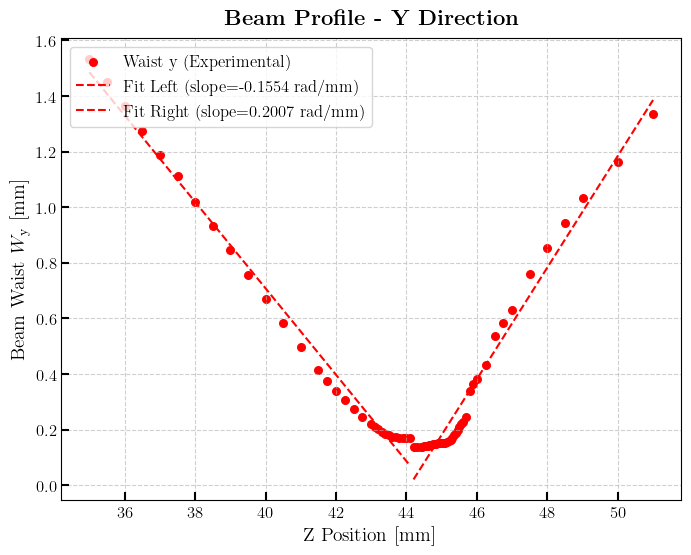

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251021_old_telescoping_LB1471-C"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 70],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to µm) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Linear fits for X direction
min_idx_x = np.argmin(width_x)
z_left_x = z_values[:min_idx_x]
width_x_left = width_x[:min_idx_x]
z_right_x = z_values[min_idx_x:]
width_x_right = width_x[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction
min_idx_y = np.argmin(width_y)
z_left_y = z_values[:min_idx_y]
width_y_left = width_y[:min_idx_y]
z_right_y = z_values[min_idx_y:]
width_y_right = width_y[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Plot Width x vs. z with linear fits
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
plt.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z with linear fits
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
plt.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 35mm_#001.txt: wx = 3439.26, wy = 3062.9
Processed 35.5mm_#001.txt: wx = 3229.87, wy = 2897.91
Processed 36mm_#001.txt: wx = 3028.3, wy = 2726.22
Processed 36.5mm_#001.txt: wx = 2820.17, wy = 2548.99
Processed 37mm_#001.txt: wx = 2625.78, wy = 2373.64
Processed 37.5mm_#001.txt: wx = 2425.43, wy = 2222.26
Processed 38mm_#001.txt: wx = 2226.71, wy = 2040.59
Processed 38.5mm_#001.txt: wx = 2025.4, wy = 1862.54
Processed 39mm_#001.txt: wx = 1821.66, wy = 1688.72
Processed 39.5mm_#001.txt: wx = 1627.44, wy = 1510.75
Processed 40mm_#001.txt: wx = 1428.14, wy = 1341.02
Processed 40.5mm_#001.txt: wx = 1235.57, wy = 1166.36
Processed 41mm_#001.txt: wx = 1045.55, wy = 991.46
Processed 41.5mm_#001.txt: wx = 861.13, wy = 830.4
Processed 41.75mm_#001.txt: wx = 771.31, wy = 752.36
Processed 42mm_#001.txt: wx = 687.47, wy = 679.73
Processed 42.25mm_#001.txt: wx = 608.58, wy = 610.26
Processed 42.5mm_#001.txt: wx = 538.55, wy = 548.52
Processed 42.75mm_#001.txt: wx = 471.54, wy = 492.13
Proc

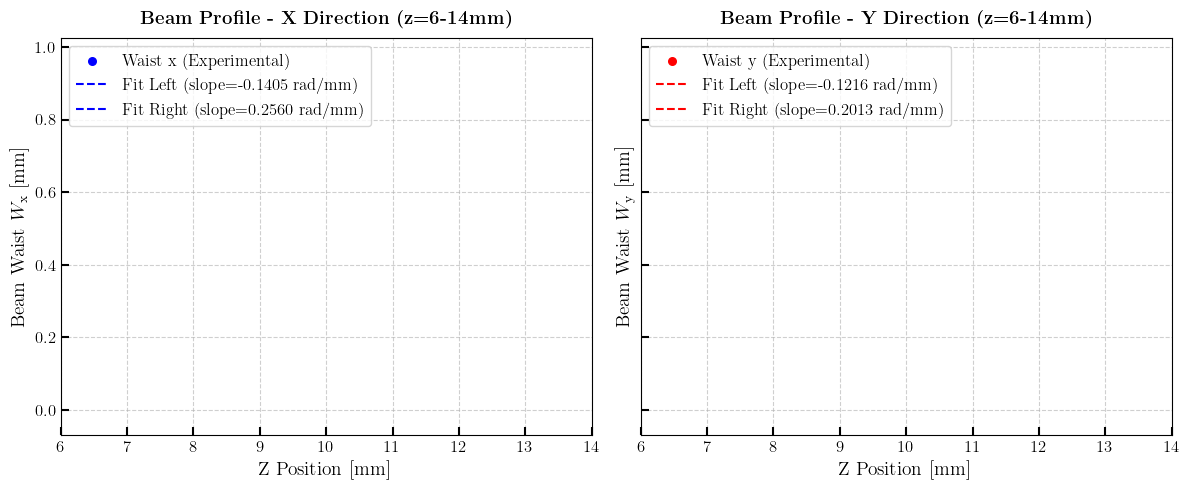

In [13]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251021_old_telescoping_LB1471-C"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 70],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 6 and 14 mm
mask = (z_values >= 40) & (z_values <= 48)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 40-48 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=6-14 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Create comparison plots in a single canvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Experimental)', marker='o', s=30)
ax1.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
ax1.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile - X Direction (z=6-14mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim(6, 14)

# Plot Width y comparison
ax2.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Experimental)', marker='o', s=30)
ax2.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
ax2.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile - Y Direction (z=6-14mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlim(6, 14)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_6-14mm.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Processed 35mm_#001.txt: wx = 3439.26, wy = 3062.9
Processed 35.5mm_#001.txt: wx = 3229.87, wy = 2897.91
Processed 36mm_#001.txt: wx = 3028.3, wy = 2726.22
Processed 36.5mm_#001.txt: wx = 2820.17, wy = 2548.99
Processed 37mm_#001.txt: wx = 2625.78, wy = 2373.64
Processed 37.5mm_#001.txt: wx = 2425.43, wy = 2222.26
Processed 38mm_#001.txt: wx = 2226.71, wy = 2040.59
Processed 38.5mm_#001.txt: wx = 2025.4, wy = 1862.54
Processed 39mm_#001.txt: wx = 1821.66, wy = 1688.72
Processed 39.5mm_#001.txt: wx = 1627.44, wy = 1510.75
Processed 40mm_#001.txt: wx = 1428.14, wy = 1341.02
Processed 40.5mm_#001.txt: wx = 1235.57, wy = 1166.36
Processed 41mm_#001.txt: wx = 1045.55, wy = 991.46
Processed 41.5mm_#001.txt: wx = 861.13, wy = 830.4
Processed 41.75mm_#001.txt: wx = 771.31, wy = 752.36
Processed 42mm_#001.txt: wx = 687.47, wy = 679.73
Processed 42.25mm_#001.txt: wx = 608.58, wy = 610.26
Processed 42.5mm_#001.txt: wx = 538.55, wy = 548.52
Processed 42.75mm_#001.txt: wx = 471.54, wy = 492.13
Proc

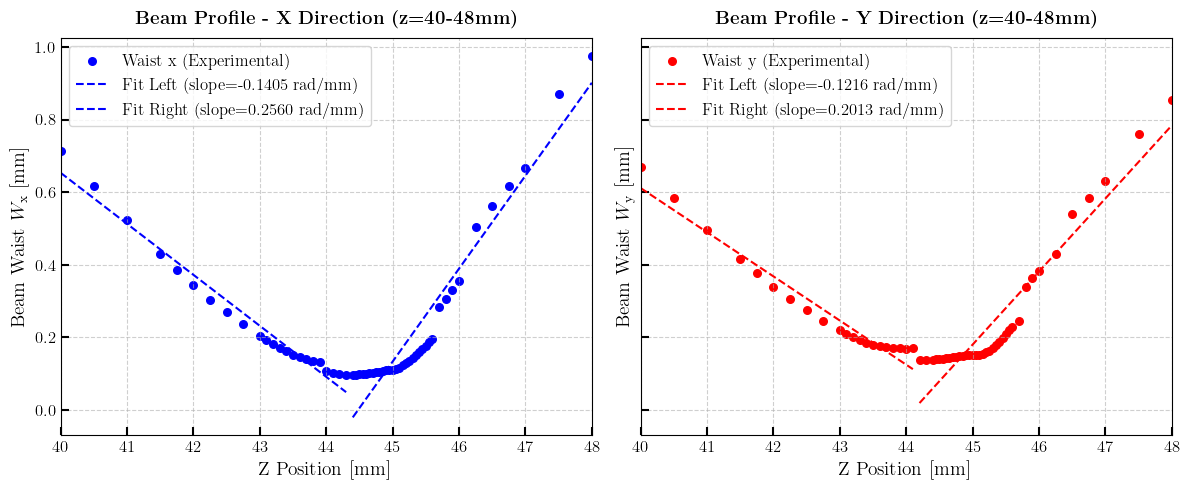

In [14]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251021_old_telescoping_LB1471-C"
# Match both *mm_#001.txt and *m_#001.txt
file_list = sorted(
    [f for f in glob.glob(os.path.join(data_path, "*[m|mm]_#001.txt"))
     if "before lens" not in os.path.basename(f).lower() and
     float(os.path.basename(f).split('m')[0].strip()) <= 70],
    key=lambda f: float(os.path.basename(f).split('m')[0])
)
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    # Split on 'm' to handle both 'mm' and 'm'
    z_str = filename.split('m')[0].strip()
    try:
        z = float(z_str)
    except ValueError:
        print(f"Error: Invalid z value in filename {filename}. Skipping.")
        continue
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
                print(f"Processed {filename}: wx = {gaussian_dia_x}, wy = {gaussian_dia_y}")
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping line.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    # Convert diameters to radii (µm to mm)
    wx = gaussian_dia_x / 2 / 1000
    wy = gaussian_dia_y / 2 / 1000
    
    z_values.append(z)
    width_x.append(wx)
    width_y.append(wy)

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort data by z
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Filter data for z between 40 and 48 mm
mask = (z_values >= 40) & (z_values <= 48)
z_values_filtered = z_values[mask]
width_x_filtered = width_x[mask]
width_y_filtered = width_y[mask]

print(f"Processed {len(z_values_filtered)} valid data points in range 40-48 mm out of {len(z_values)} total files.")

# Print filtered data
for z, wx, wy in zip(z_values_filtered, width_x_filtered, width_y_filtered):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Linear fits for X direction (filtered range)
min_idx_x = np.argmin(width_x_filtered)
z_left_x = z_values_filtered[:min_idx_x]
width_x_left = width_x_filtered[:min_idx_x]
z_right_x = z_values_filtered[min_idx_x:]
width_x_right = width_x_filtered[min_idx_x:]
fit_left_x = np.polyfit(z_left_x, width_x_left, 1)
fit_right_x = np.polyfit(z_right_x, width_x_right, 1)
theta_left_x = fit_left_x[0]
theta_right_x = fit_right_x[0]

# Linear fits for Y direction (filtered range)
min_idx_y = np.argmin(width_y_filtered)
z_left_y = z_values_filtered[:min_idx_y]
width_y_left = width_y_filtered[:min_idx_y]
z_right_y = z_values_filtered[min_idx_y:]
width_y_right = width_y_filtered[min_idx_y:]
fit_left_y = np.polyfit(z_left_y, width_y_left, 1)
fit_right_y = np.polyfit(z_right_y, width_y_right, 1)
theta_left_y = fit_left_y[0]
theta_right_y = fit_right_y[0]

# Wavelength
lambda_wavelength = 0.001064  # 1064nm

# Estimate minimum beam waist w_0 for X and Y (in mm)
w0_left_x_mm = lambda_wavelength / (np.pi * abs(theta_left_x))
w0_right_x_mm = lambda_wavelength / (np.pi * abs(theta_right_x))
w0_left_y_mm = lambda_wavelength / (np.pi * abs(theta_left_y))
w0_right_y_mm = lambda_wavelength / (np.pi * abs(theta_right_y))

# Convert w_0 to micrometers
w0_left_x_um = w0_left_x_mm * 1000
w0_right_x_um = w0_right_x_mm * 1000
w0_left_y_um = w0_left_y_mm * 1000
w0_right_y_um = w0_right_y_mm * 1000

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (X Direction, z=40-48 mm)")
print(f"  Theta Left: {theta_left_x:.6f} rad/mm ({np.degrees(theta_left_x):.4f} degrees)")
print(f"  Theta Right: {theta_right_x:.6f} rad/mm ({np.degrees(theta_right_x):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_x_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_x_um:.2f} μm")

print("\nDIVERGENCE AND BEAM WAIST ESTIMATION (Y Direction, z=40-48 mm)")
print(f"  Theta Left: {theta_left_y:.6f} rad/mm ({np.degrees(theta_left_y):.4f} degrees)")
print(f"  Theta Right: {theta_right_y:.6f} rad/mm ({np.degrees(theta_right_y):.4f} degrees)")
print(f"  Estimated w_0 (Left): {w0_left_y_um:.2f} μm")
print(f"  Estimated w_0 (Right): {w0_right_y_um:.2f} μm")

# Create comparison plots in a single canvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_filtered, width_x_filtered, color='b', label='Waist x (Experimental)', marker='o', s=30)
ax1.plot(z_left_x, np.polyval(fit_left_x, z_left_x), 'b--', label=f'Fit Left (slope={theta_left_x:.4f} rad/mm)')
ax1.plot(z_right_x, np.polyval(fit_right_x, z_right_x), 'b--', label=f'Fit Right (slope={theta_right_x:.4f} rad/mm)')
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile - X Direction (z=40-48mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim(40, 48)

# Plot Width y comparison
ax2.scatter(z_values_filtered, width_y_filtered, color='r', label='Waist y (Experimental)', marker='o', s=30)
ax2.plot(z_left_y, np.polyval(fit_left_y, z_left_y), 'r--', label=f'Fit Left (slope={theta_left_y:.4f} rad/mm)')
ax2.plot(z_right_y, np.polyval(fit_right_y, z_right_y), 'r--', label=f'Fit Right (slope={theta_right_y:.4f} rad/mm)')
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile - Y Direction (z=40-48mm)}', fontsize=13.5, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlim(40, 48)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_40-48mm.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()